<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.639714,74.166851,69.531693,22.785938,-0.008880,251.115316,251.097285,0.018031
1,0.0,1.0,90.127230,85.992474,38.983028,43.519071,-0.055617,268.566186,268.614163,-0.047977
2,0.0,2.0,42.337226,37.595931,53.291185,75.393595,0.018477,218.636414,218.621449,0.014965
3,0.0,3.0,20.299377,36.258143,98.399197,52.998622,-0.072171,217.883168,217.936003,-0.052835
4,0.0,4.0,30.602613,73.021899,68.366938,82.194288,0.090959,264.276697,264.193976,0.082720
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.564259,77.387063,60.277468,65.491813,-0.091509,280.629094,280.718665,-0.089570
119996,999.0,116.0,97.994420,55.783705,37.675152,64.866107,0.084908,266.404291,266.334065,0.070226
119997,999.0,117.0,81.408864,47.622992,84.367713,52.960643,0.053687,276.413899,276.361121,0.052778
119998,999.0,118.0,98.142626,97.860399,33.000741,31.929999,0.024665,270.958430,270.941732,0.016698


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.639714,74.166851,69.531693,22.785938,-0.008880,251.115316,251.097285,0.018031
1,0.0,1.0,90.127230,85.992474,38.983028,43.519071,-0.055617,268.566186,268.614163,-0.047977
2,0.0,2.0,42.337226,37.595931,53.291185,75.393595,0.018477,218.636414,218.621449,0.014965
3,0.0,3.0,20.299377,36.258143,98.399197,52.998622,-0.072171,217.883168,217.936003,-0.052835
4,0.0,4.0,30.602613,73.021899,68.366938,82.194288,0.090959,264.276697,264.193976,0.082720
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.564259,77.387063,60.277468,65.491813,-0.091509,280.629094,280.718665,-0.089570
119996,999.0,116.0,97.994420,55.783705,37.675152,64.866107,0.084908,266.404291,266.334065,0.070226
119997,999.0,117.0,81.408864,47.622992,84.367713,52.960643,0.053687,276.413899,276.361121,0.052778
119998,999.0,118.0,98.142626,97.860399,33.000741,31.929999,0.024665,270.958430,270.941732,0.016698


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.639714  74.166851  69.531693  22.785938 -0.008880  251.115316   
      1.0    90.127230  85.992474  38.983028  43.519071 -0.055617  268.566186   
      2.0    42.337226  37.595931  53.291185  75.393595  0.018477  218.636414   
      3.0    20.299377  36.258143  98.399197  52.998622 -0.072171  217.883168   
      4.0    30.602613  73.021899  68.366938  82.194288  0.090959  264.276697   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.564259  77.387063  60.277468  65.491813 -0.091509  280.629094   
      116.0  97.994420  55.783705  37.675152  64.866107  0.084908  266.404291   
      117.0  81.408864  47.622992  84.367713  52.960643  0.053687  276.413899   
      118.0  98.142626  97.860399  33.000741  31.929999  0.024665  270.958430   
      119.0  41.252855  81.284048  92.782768  66.508745  0.004933  291.833350   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.097285  0.018031  
      1.0    268.614163 -0.047977  
      2.0    218.621449  0.014965  
      3.0    217.936003 -0.052835  
      4.0    264.193976  0.082720  
...                 ...       ...  
999.0 115.0  280.718665 -0.089570  
      116.0  266.334065  0.070226  
      117.0  276.361121  0.052778  
      118.0  270.941732  0.016698  
      119.0  291.811936  0.021414  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.639714  74.166851  69.531693  22.785938 -0.008880  251.115316   
      1.0    90.127230  85.992474  38.983028  43.519071 -0.055617  268.566186   
      2.0    42.337226  37.595931  53.291185  75.393595  0.018477  218.636414   
      3.0    20.299377  36.258143  98.399197  52.998622 -0.072171  217.883168   
      4.0    30.602613  73.021899  68.366938  82.194288  0.090959  264.276697   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.564259  77.387063  60.277468  65.491813 -0.091509  280.629094   
      116.0  97.994420  55.783705  37.675152  64.866107  0.084908  266.404291   
      117.0  81.408864  47.622992  84.367713  52.960643  0.053687  276.413899   
      118.0  98.142626  97.860399  33.000741  31.929999  0.024665  270.958430   
      119.0  41.252855  81.284048  92.782768  66.508745  0.004933  291.833350   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.097285  0.018031  
      1.0    268.614163 -0.047977  
      2.0    218.621449  0.014965  
      3.0    217.936003 -0.052835  
      4.0    264.193976  0.082720  
...                 ...       ...  
999.0 115.0  280.718665 -0.089570  
      116.0  266.334065  0.070226  
      117.0  276.361121  0.052778  
      118.0  270.941732  0.016698  
      119.0  291.811936  0.021414  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.639714,74.166851,69.531693,22.785938,-0.008880,251.115316,251.097285,0.018031
1,0.0,1.0,90.127230,85.992474,38.983028,43.519071,-0.055617,268.566186,268.614163,-0.047977
2,0.0,2.0,42.337226,37.595931,53.291185,75.393595,0.018477,218.636414,218.621449,0.014965
3,0.0,3.0,20.299377,36.258143,98.399197,52.998622,-0.072171,217.883168,217.936003,-0.052835
4,0.0,4.0,30.602613,73.021899,68.366938,82.194288,0.090959,264.276697,264.193976,0.082720
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.564259,77.387063,60.277468,65.491813,-0.091509,280.629094,280.718665,-0.089570
119996,999.0,116.0,97.994420,55.783705,37.675152,64.866107,0.084908,266.404291,266.334065,0.070226
119997,999.0,117.0,81.408864,47.622992,84.367713,52.960643,0.053687,276.413899,276.361121,0.052778
119998,999.0,118.0,98.142626,97.860399,33.000741,31.929999,0.024665,270.958430,270.941732,0.016698


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.639714  74.166851  69.531693  22.785938 -0.008880  251.115316   
      1.0    90.127230  85.992474  38.983028  43.519071 -0.055617  268.566186   
      2.0    42.337226  37.595931  53.291185  75.393595  0.018477  218.636414   
      3.0    20.299377  36.258143  98.399197  52.998622 -0.072171  217.883168   
      4.0    30.602613  73.021899  68.366938  82.194288  0.090959  264.276697   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.564259  77.387063  60.277468  65.491813 -0.091509  280.629094   
      116.0  97.994420  55.783705  37.675152  64.866107  0.084908  266.404291   
      117.0  81.408864  47.622992  84.367713  52.960643  0.053687  276.413899   
      118.0  98.142626  97.860399  33.000741  31.929999  0.024665  270.958430   
      119.0  41.252855  81.284048  92.782768  66.508745  0.004933  291.833350   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.097285  0.018031  
      1.0    268.614163 -0.047977  
      2.0    218.621449  0.014965  
      3.0    217.936003 -0.052835  
      4.0    264.193976  0.082720  
...                 ...       ...  
999.0 115.0  280.718665 -0.089570  
      116.0  266.334065  0.070226  
      117.0  276.361121  0.052778  
      118.0  270.941732  0.016698  
      119.0  291.811936  0.021414  

[120000 rows x 8 columns]

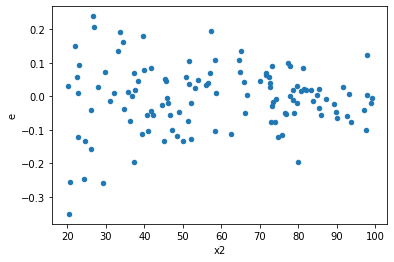

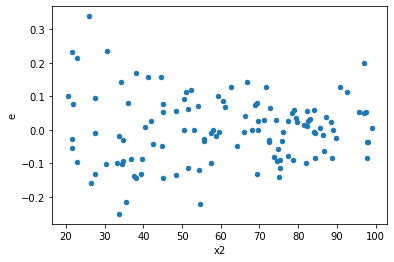

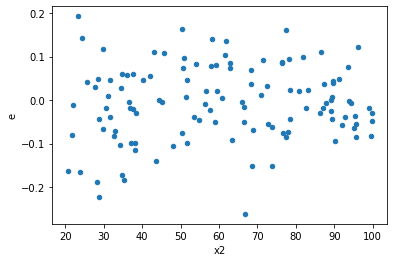

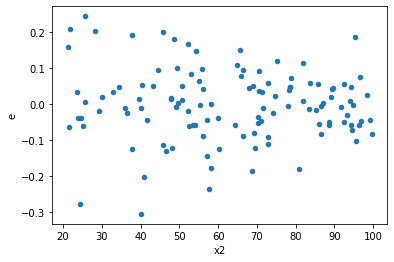

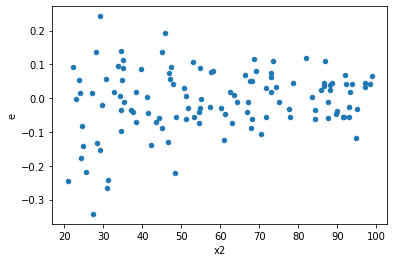

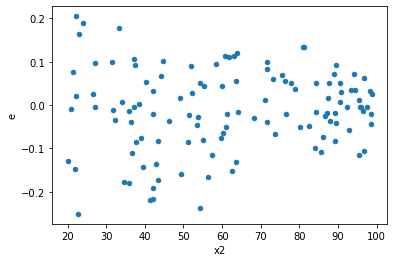

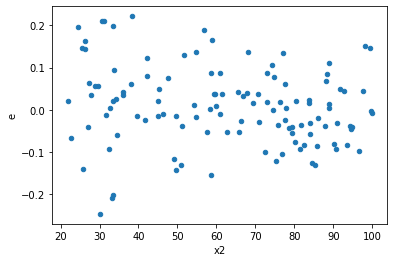

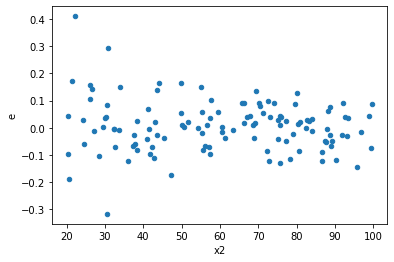

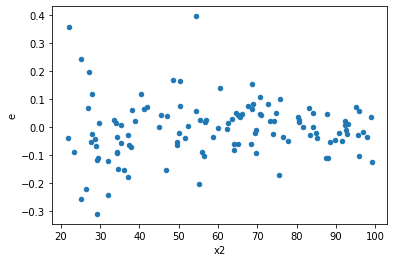

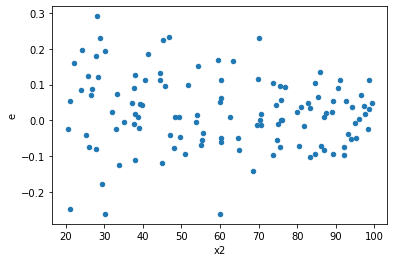

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
284.0,44.0,44.0,0.3101564268467313,0.37032594705900157,0.007049009701062075,0.00841649879679549,1.1939973349061181,0.5589858787799475,0.7205070606100262,0.27949293938997377,Reject001=1 : Homoscedasticity
871.0,44.0,44.0,0.33351983095511495,0.3699400081633787,0.007579996158070795,0.008407727458258607,1.10919943531983,0.7325715533429267,0.6337142233285367,0.36628577667146334,Reject001=1 : Homoscedasticity
872.0,44.0,44.0,0.32123378102023004,0.32522839031170125,0.007300767750459774,0.007391554325265937,1.0124352092696616,0.9674902106498657,0.5162548946750671,0.48374510532493287,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.7309540987583811,0.18133902236125604,0.016612593153599572,0.004121341417301274,0.24808537590702825,9.426261350563362e-06,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,0.7802002632813041,0.19178661398742364,0.017731824165484186,0.004358786681532356,0.24581716132832712,8.307253154872228e-06,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,0.3572376797926997,0.23082154048142273,0.008119038177106812,0.0052459441018505165,0.6461287639516788,0.1513669093361093,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,0.5757018580222598,0.20184429033039203,0.013084133136869541,0.004587370234781637,0.3506055912756627,0.0007187955625376856,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,0.7250197700382408,0.16043763718815865,0.016477722046323653,0.0036463099360945148,0.22128725838703192,1.8823323421785814e-06,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,0.5780797967658524,0.158577194864159,0.013138177199223918,0.0036040271560036138,0.27431713710000094,3.622891467490222e-05,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,0.61089394818962,0.23806750026436915,0.013883953367945907,0.00541062500600839,0.38970348449167086,0.002263391704742182,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,0.7037234212807641,0.19334545669983808,0.015993714120017367,0.00439421492499632,0.27474637173216826,3.697571393478308e-05,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,0.6991663903776214,0.1655235678746416,0.01589014523585503,0.003761899269878218,0.23674417156299793,4.923547819918456e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    815
Reject001=1 : Homoscedasticity      185
Name: Result_test, dtype: int64